In [1]:
import nibabel as nib
import numpy as np
import json
import os
import os.path
import matplotlib.pyplot as plt
import pandas as pd
from src.utils.data import getDataPandas

In [17]:
data = getDataPandas()
data = data.sample(frac=1, random_state=1).reset_index(drop=True)

In [18]:
dup = np.sum(data.duplicated(subset=['PATNO']))
print('患者出现不止一次: {}'.format(dup))

患者出现不止一次: 202


In [19]:
data_pvi = data
data_pv = data.drop_duplicates(subset=['PATNO', 'EVENT_ID'], keep='first').reset_index(drop=True)
data_p = data.drop_duplicates(subset=['PATNO'], keep='first').reset_index(drop=True)

(array([ 8., 13., 20., 26., 13., 16., 26.,  7.,  7.,  4.,  8.,  5.,  4.,
         1.,  0.,  0.,  1.,  0.,  0.,  2.]),
 array([ 1.  ,  4.15,  7.3 , 10.45, 13.6 , 16.75, 19.9 , 23.05, 26.2 ,
        29.35, 32.5 , 35.65, 38.8 , 41.95, 45.1 , 48.25, 51.4 , 54.55,
        57.7 , 60.85, 64.  ]),
 <BarContainer object of 20 artists>)

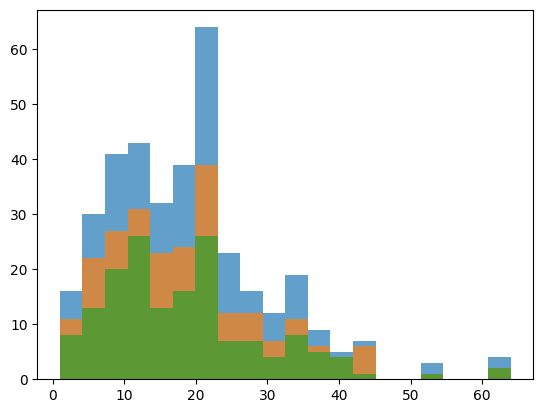

In [30]:
plt.hist(data_pvi['NUPDR3ON'], 20, alpha=0.7)
plt.hist(data_pv['NUPDR3ON'], 20, alpha=0.7)
plt.hist(data_p['NUPDR3ON'], 20, alpha=0.7)

(array([ 2.,  2., 11.,  6., 13., 15., 15., 15., 11., 20.,  7., 12.,  8.,
         4.,  5.,  6.,  1.,  5.,  2.,  1.]),
 array([ 2.,  5.,  8., 11., 14., 17., 20., 23., 26., 29., 32., 35., 38.,
        41., 44., 47., 50., 53., 56., 59., 62.]),
 <BarContainer object of 20 artists>)

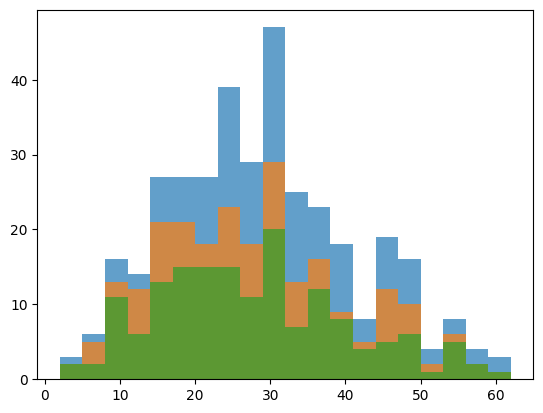

In [31]:
plt.hist(data_pvi['NUPDR3OF'], 20, alpha=0.7)
plt.hist(data_pv['NUPDR3OF'], 20, alpha=0.7)
plt.hist(data_p['NUPDR3OF'], 20, alpha=0.7)

(array([ 1.,  3.,  1.,  3., 22.,  7.,  8., 18., 15.,  7., 14., 18.,  9.,
        13.,  8.,  3.,  2.,  4.,  2.,  3.]),
 array([-0.27272727, -0.21126482, -0.14980237, -0.08833992, -0.02687747,
         0.03458498,  0.09604743,  0.15750988,  0.21897233,  0.28043478,
         0.34189723,  0.40335968,  0.46482213,  0.52628458,  0.58774704,
         0.64920949,  0.71067194,  0.77213439,  0.83359684,  0.89505929,
         0.95652174]),
 <BarContainer object of 20 artists>)

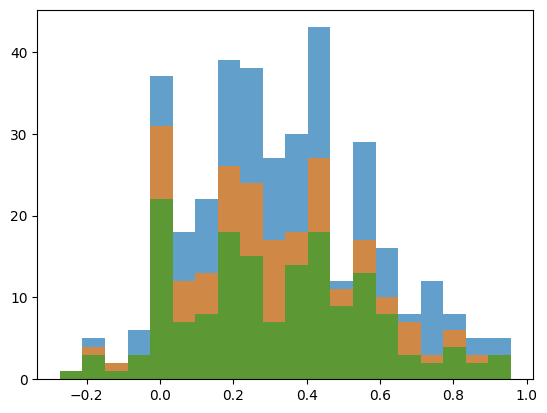

In [32]:
plt.hist(data_pvi['SCORE'], 20, alpha=0.7)
plt.hist(data_pv['SCORE'], 20, alpha=0.7)
plt.hist(data_p['SCORE'], 20, alpha=0.7)

(array([ 4.,  5., 19.,  9., 13., 11.,  9.,  3., 25., 26., 10.,  5.,  8.,
         3.,  1.,  2.,  2.,  2.,  2.,  2.]),
 array([  2. ,   7.5,  13. ,  18.5,  24. ,  29.5,  35. ,  40.5,  46. ,
         51.5,  57. ,  62.5,  68. ,  73.5,  79. ,  84.5,  90. ,  95.5,
        101. , 106.5, 112. ]),
 <BarContainer object of 20 artists>)

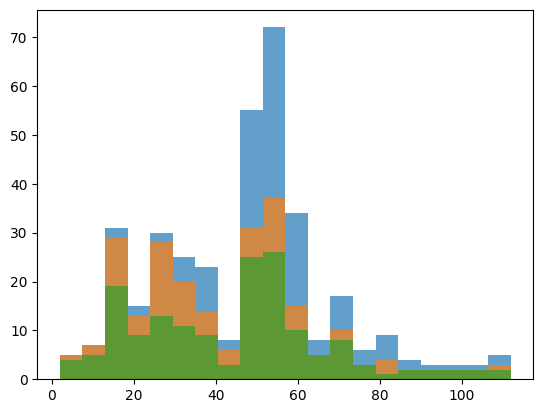

In [33]:
plt.hist(data_pvi['DURATION'], 20, alpha=0.7)
plt.hist(data_pv['DURATION'], 20, alpha=0.7)
plt.hist(data_p['DURATION'], 20, alpha=0.7)